In [78]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# 이미지1과 이미지2를 로드하고 텐서로 변환합니다.
image1 = Image.open('/nvme_data1/tak//train_cmia/n02676566_n01910747/8802_1124.png')
image2 = Image.open('/nvme_data1/tak/train_10/n01910747/n01910747_1124.JPEG')

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

image1 = transform(image1)
image2 = transform(image2)


In [79]:
def mixup_images(image1, image2, alpha):
    # mixup을 수행할 이미지와 alpha 값을 받아와서 mixup을 수행합니다.
    mixed_image = alpha * image1 + (1 - alpha) * image2
    return mixed_image


In [80]:
# mixup에 사용할 alpha 값을 선택합니다.
alpha = 0.5  # alpha는 mixup의 강도를 조절합니다.

# 이미지를 mixup합니다.
mixed_image = mixup_images(image1, image2, alpha)


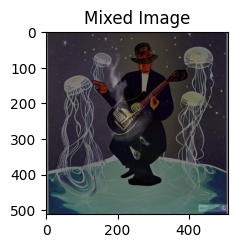

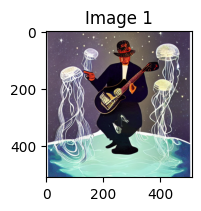

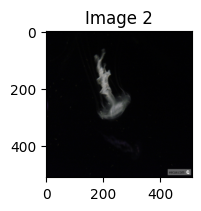

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# mixup된 이미지를 시각화하기 위한 함수
def imshow(tensor, title=None):
    tensor = tensor.cpu().numpy().transpose((1, 2, 0))  # Tensor를 NumPy 배열로 변환하고 채널 순서를 변경합니다.
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # tensor = std * tensor + mean
    # tensor = np.clip(tensor, 0, 1)  # 픽셀 값을 0과 1 사이로 클리핑합니다.
    plt.imshow(tensor)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 시각화가 업데이트되도록 잠시 멈춥니다.

# mixup된 이미지를 시각화하여 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
imshow(mixed_image, title='Mixed Image')
plt.subplot(1, 3, 2)
imshow(image1, title='Image 1')
plt.show()
plt.subplot(1, 3, 3)
imshow(image2, title='Image 2')
plt.show()

In [82]:
def cutmix_images(image1, image2, alpha):
    channels, height, width = image1.size()  # 이미지1의 크기 정보를 가져옵니다.
    
    # 나머지 코드는 그대로 유지합니다.
    lam = np.random.beta(alpha, alpha)
    cut_ratio = np.sqrt(1.0 - lam)
    cut_width = int(width * cut_ratio)
    cut_height = int(height * cut_ratio)
    cx = np.random.randint(0, width - cut_width + 1)
    cy = np.random.randint(0, height - cut_height + 1)
    
    cutmix_image = image1.clone()
    cutmix_image[:, cy:cy + cut_height, cx:cx + cut_width] = image2[:, cy:cy + cut_height, cx:cx + cut_width]
    
    return cutmix_image


In [83]:
image1.size()

torch.Size([3, 512, 512])

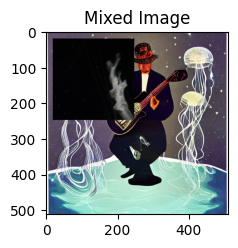

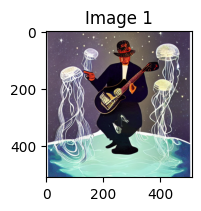

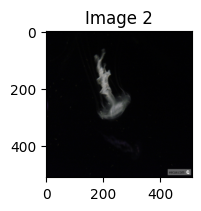

In [84]:
# 이미지1과 이미지2를 cutmix합니다.
cutmix_image = cutmix_images(image1, image2, alpha)

# mixup된 이미지를 시각화하여 출력
plt.figure(figsize=(8, 4))
plt.subplot(1, 3, 1)
imshow(cutmix_image, title='Mixed Image')
plt.subplot(1, 3, 2)
imshow(image1, title='Image 1')
plt.show()
plt.subplot(1, 3, 3)
imshow(image2, title='Image 2')
plt.show()